#1) The start

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1.1) Data insertion


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importation des données à partir du fichier Excel
df = pd.read_excel('/content/drive/MyDrive/Portfolio data/Python/stock portfolio performance/Database - stock portfolio performance.xlsx', sheet_name='all period', skiprows=1)


df.head()


,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.139,0.010,1.33,0.149,0.663,0.525,0.531875,0.478116,0.738015,0.800000,0.52,0.411765
1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.143,0.010,1.17,0.108,0.663,0.650,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
2,3,0.0,0.0,1.0,0.0,0.0,0.0,0.173,0.018,1.30,0.144,0.638,0.513,0.692625,0.629895,0.703051,0.756879,0.44,0.376471
3,4,0.0,0.0,0.0,1.0,0.0,0.0,0.096,-0.002,1.39,0.144,0.613,0.475,0.324351,0.255634,0.800000,0.756046,0.36,0.270588
4,5,0.0,0.0,0.0,0.0,1.0,0.0,0.096,0.001,1.04,0.087,0.725,0.538,0.326615,0.306501,0.432452,0.209289,0.72,0.447059


In [40]:
mean_annual_return = df['Annual Return'].mean()
print(f"The mean annual return is {mean_annual_return}")


The mean annual return is 0.14923809523809525


##1.2) On commence à trier les données

In [41]:
# Calculer la matrice de covariance
cov_matrix = df.cov()

# Extraire la diagonale de la matrice de covariance pour obtenir la variance
variance = cov_matrix.values.diagonal()

# Calculer le risque systématique
systematic_risk = variance / df['Total Risk'].values.reshape(-1, 1) ** 2

# Calculer la volatilité
volatility = df['Total Risk']

print(systematic_risk)
print(volatility)
print(variance)
print(cov_matrix)

[[1.51344534e+04 1.78920948e+00 1.78920948e+00 ... 8.41131309e-01
  5.73155659e-01 1.14544994e+00]
 [2.88065844e+04 3.40554181e+00 3.40554181e+00 ... 1.60099076e+00
  1.09093182e+00 2.18022412e+00]
 [1.62037037e+04 1.91561727e+00 1.91561727e+00 ... 9.00557301e-01
  6.13649150e-01 1.22637607e+00]
 ...
 [3.10650888e+04 3.67254434e+00 3.67254434e+00 ... 1.72651222e+00
  1.17646346e+00 2.35115885e+00]
 [3.80262562e+04 4.49550018e+00 4.49550018e+00 ... 2.11339477e+00
  1.44008927e+00 2.87801427e+00]
 [3.72299169e+04 4.40135619e+00 4.40135619e+00 ... 2.06913642e+00
  1.40993117e+00 2.81774339e+00]]
0     0.149
1     0.108
2     0.144
3     0.144
4     0.087
      ...  
58    0.100
59    0.087
60    0.104
61    0.094
62    0.095
Name: Total Risk, Length: 63, dtype: float64
[3.36000000e+02 3.97222396e-02 3.97222396e-02 3.97222396e-02
 3.97222396e-02 3.97222396e-02 3.97222396e-02 7.76861751e-04
 5.04183308e-05 1.25826933e-02 2.03833077e-04 1.23872709e-03
 3.19176856e-03 1.77842873e-02 1.8782005

In [42]:
sharpe_ratio = (df['Annual Return'] - 0.02) / df['Total Risk']
print(sharpe_ratio)

df['Sharpe Ratio'] = (df['Annual Return'] - 0.02) / df['Total Risk']

# Volatilité et risque systematique =  analyse plus approfondie. Calculer le ratio de Sharpe pour chaque portefeuille en utilisant la formule suivante:
# Cela donne une mesure de la performance ajustée au risque de chaque portefeuille.
# Vous pouvez également utiliser ces mesures pour construire un portefeuille optimal en utilisant des techniques telles que la théorie moderne du portefeuille ou l’optimisation de Markowitz.

0     0.798658
1     1.138889
2     1.062500
3     0.527778
4     0.873563
        ...   
58    1.510000
59    1.528736
60    1.307692
61    1.500000
62    1.610526
Length: 63, dtype: float64


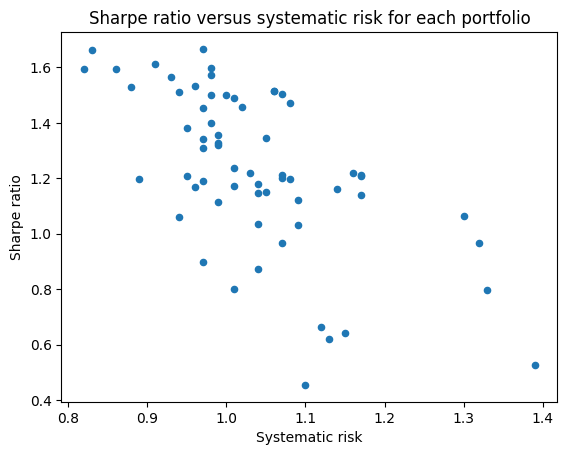

In [43]:
# Calculer le ratio de Sharpe
sharpe_ratio = (df['Annual Return'] - 0.02) / df['Total Risk']

# Tracer un graphique en nuage de points du ratio de Sharpe par rapport au risque systématique
df.plot(kind='scatter', x='Systematic Risk', y='Sharpe Ratio')
plt.title("Sharpe ratio versus systematic risk for each portfolio")
plt.xlabel("Systematic risk")
plt.ylabel("Sharpe ratio")
plt.show()

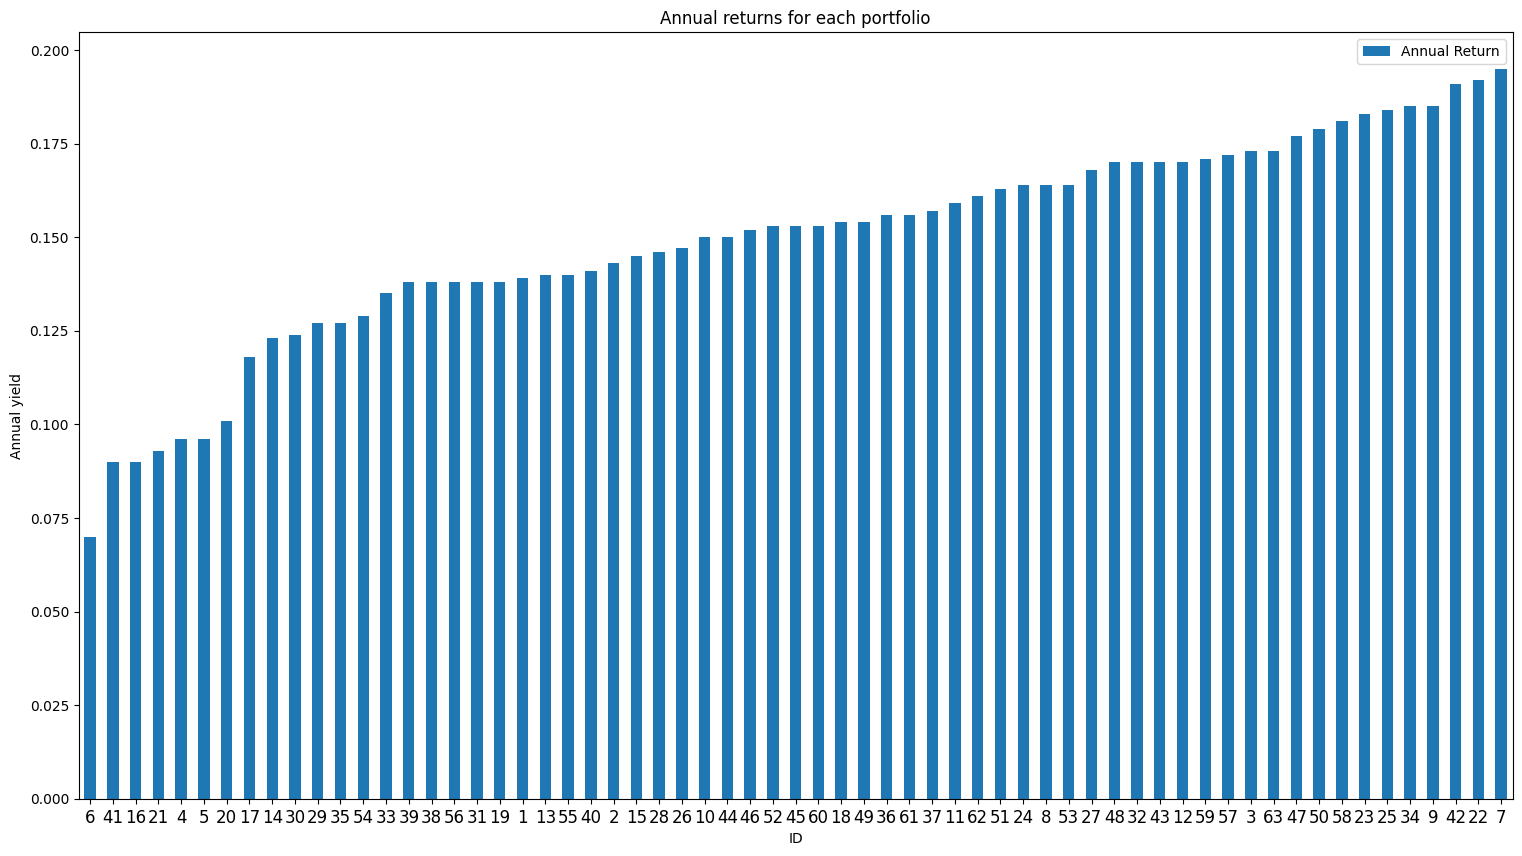

In [46]:
df = df.sort_values('Annual Return')
ax = df.plot(kind='bar', x='ID', y='Annual Return', legend=True, width=0.5)
plt.title('Annual returns for each portfolio')
plt.xlabel('ID')
plt.ylabel('Annual yield')
plt.xticks(rotation=0)
plt.subplots_adjust(bottom=0.15)
ax.set_xticklabels(df['ID'], fontsize=12)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

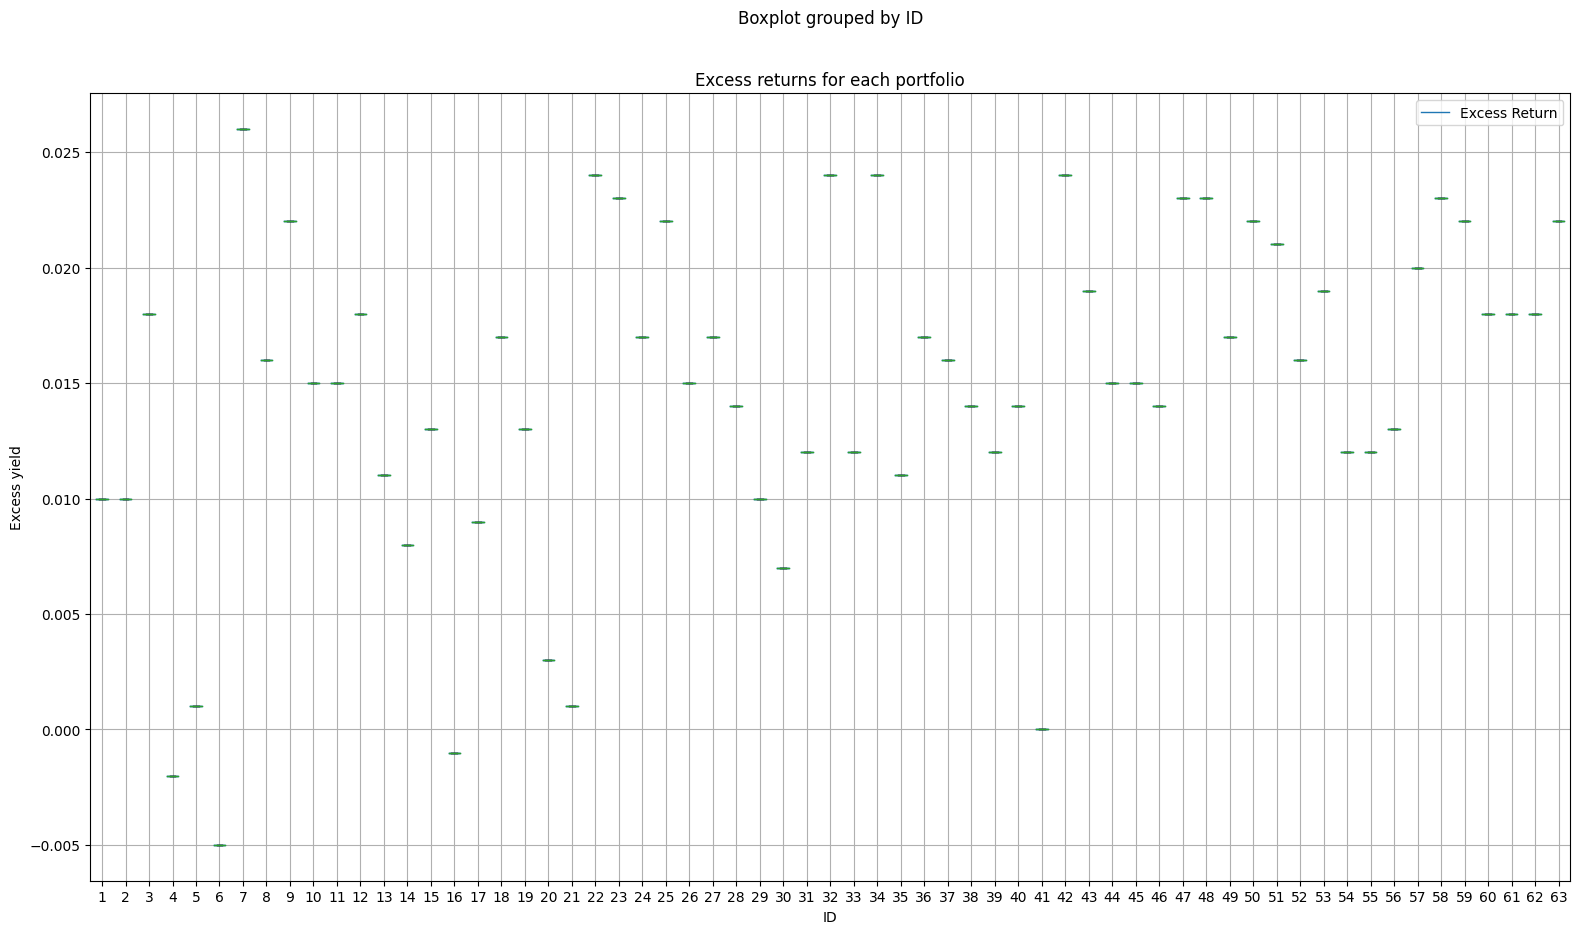

In [47]:
# Tracer un graphique en boîte des rendements excédentaires

df.boxplot(column=['Excess Return'], by='ID')
plt.title('Excess returns for each portfolio')
plt.xlabel('ID')
plt.ylabel('Excess yield')
ax.set_xticklabels(df['ID'], fontsize=14)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.legend(['Excess Return'])
plt.show()


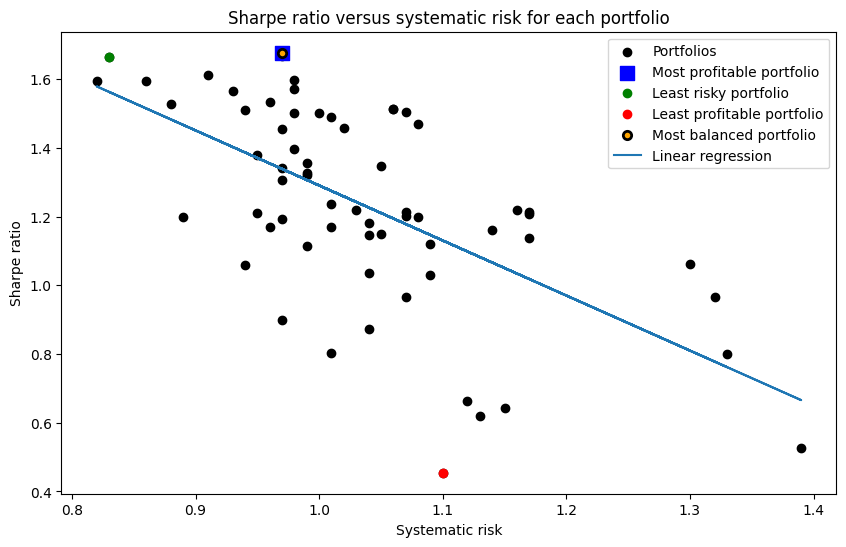

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Calculer le ratio de Sharpe
df['Sharpe Ratio'] = (df['Annual Return'] - 0.02) / df['Total Risk']
balanced_idx = ((df['Annual Return'] - 0.02) / df['Total Risk']).idxmax()

# Trouver les indices des portefeuilles les plus rentables et les moins risqués
max_return_idx = df['Annual Return'].idxmax()
min_risk_idx = df['Total Risk'].idxmin()

# Tracer un graphique en nuage de points du ratio de Sharpe par rapport au risque systématique
plt.figure(figsize=(10, 6))
plt.scatter(df['Systematic Risk'], df['Sharpe Ratio'], c='black')

# Colorer les points correspondants aux portefeuilles les plus rentables et les moins risqués
plt.scatter(df.loc[max_return_idx, 'Systematic Risk'], df.loc[max_return_idx, 'Sharpe Ratio'] + 0.01, c='blue', marker='s', s=100)
plt.scatter(df.loc[min_risk_idx, 'Systematic Risk'], df.loc[min_risk_idx, 'Sharpe Ratio'], c='green')
plt.scatter(df.loc[df['Annual Return'].idxmin(), 'Systematic Risk'], df.loc[df['Annual Return'].idxmin(), 'Sharpe Ratio'], c='red')
plt.scatter(df.loc[balanced_idx, 'Systematic Risk'], df.loc[balanced_idx, 'Sharpe Ratio'] + 0.01, c='orange', edgecolors='black', linewidths=2)

# Ajouter une régression linéaire
x = df['Systematic Risk']
y = df['Sharpe Ratio']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

# Mettre à jour la légende
plt.legend(['Portfolios', 'Most profitable portfolio', 'Least risky portfolio', 'Least profitable portfolio', 'Most balanced portfolio', 'Linear regression'])

plt.title("Sharpe ratio versus systematic risk for each portfolio")
plt.xlabel("Systematic risk")
plt.ylabel("Sharpe ratio")

plt.show()

# 2) Starting of anwser

In [33]:
data = pd.read_excel('/content/drive/MyDrive/Portfolio data/Python/stock portfolio performance/Database - stock portfolio performance.xlsx', sheet_name='all period', skiprows=1)


In [34]:
log_returns = np.log(data / data.shift(1))
log_returns.head()


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.693147,-inf,inf,NaN,NaN,NaN,NaN,0.028371,0.000000,-0.128175,-0.321815,0.000000,0.213574,0.032986,0.019632,-0.255561,-0.663028,0.000000,0.619039
2,0.405465,NaN,-inf,inf,NaN,NaN,NaN,0.190447,0.587787,0.105361,0.287682,-0.038437,-0.236697,0.231096,0.256068,0.207027,0.607620,-0.167054,-0.708651
3,0.287682,NaN,NaN,-inf,inf,NaN,NaN,-0.588943,NaN,0.066939,0.000000,-0.039973,-0.076961,-0.758662,-0.901806,0.129182,-0.001101,-0.200671,-0.330242
4,0.223144,NaN,NaN,NaN,-inf,inf,NaN,0.000000,NaN,-0.290083,-0.503905,0.167807,0.124544,0.006954,0.181473,-0.615141,-1.284387,0.693147,0.502092


In [ ]:
print(len(vol_arr))
print(len(sharpe_arr))
print(len(ret_arr))
print(vol_arr)
print(sharpe_arr)

63
63
63
[1.76641995 1.78012589 1.89251058 2.13869788 1.47883647 1.94226398
 1.40628947 1.78374281 1.88225284 1.63791353 2.15325642 1.70218494
 2.05369027 1.76282895 1.76292567 2.14039688 1.04691724 2.28862423
 1.88467959 1.12969871 1.71368069 1.39703776 1.85028188 2.09101538
 2.32515689 1.83514539 1.74695561 1.66602977 1.56056188 1.95901786
 1.55118187 1.51869083 1.37560815 1.5151008  1.63168155 2.19367108
 1.59444541 2.15506575 1.48715683 1.89972468 2.13663821 1.83982144
 1.84381717 2.32720989 1.53424036 2.31645223 1.81890825 1.59027138
 1.53687869 1.52553088 1.28045046 1.23442488 2.00920056 1.96047834
 1.40812295 1.95217802 1.70269944 1.65797999 1.62158877 1.3876125
 1.85937299 1.81841727 2.07549735]
[ 0.46831059 -0.02222072  0.46292115  0.18087502  0.6980038   0.61324915
  0.70838183  0.43816621  0.24507722 -0.0868612   0.1154788   0.1251576
  0.86587623  0.81228763  0.59816971  0.08447297  0.96417728  0.3485159
 -0.16131449  1.11314021 -0.17909449  0.80196953  0.76751703  0.434465

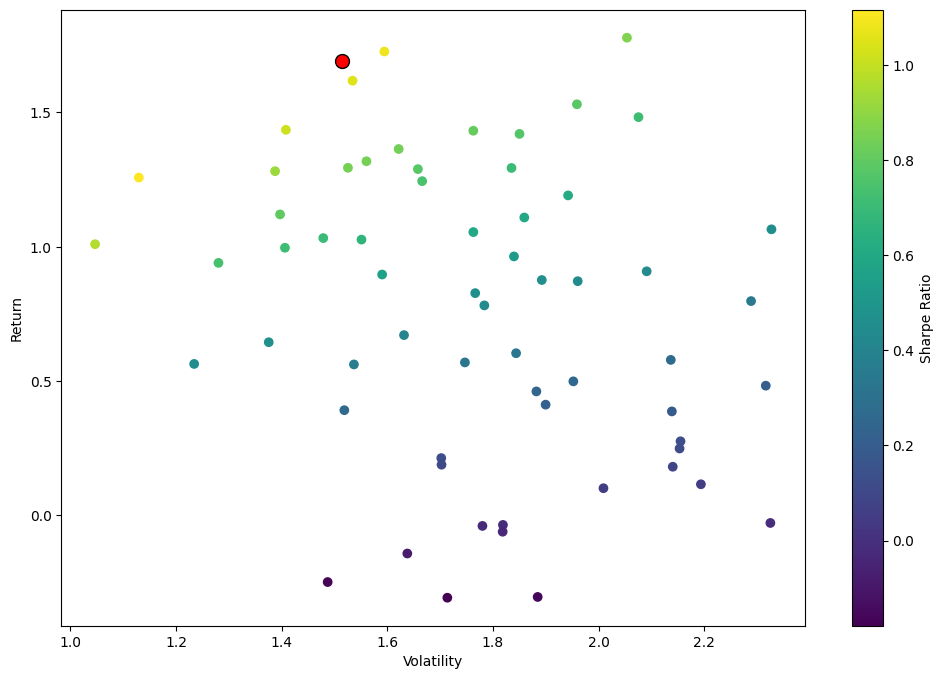

In [37]:
np.random.seed(42) # set the random seed for reproducibility
num_ports = 63 # number of portfolios to simulate

vol_arr = np.zeros(num_ports)
ret_arr = np.zeros(num_ports)
all_weights = np.zeros((num_ports, len(data.columns))) # define all_weights here
sharpe_arr = np.zeros(num_ports) # define sharpe_arr here

for i in range(num_ports):
    # generate random weights
    weights = np.array(np.random.random(len(data.columns)))
    weights = weights / np.sum(weights)

    # save weights
    all_weights[i, :] = weights

    # calculate expected return
    ret_arr[i] = np.sum((log_returns.mean() * weights) * 252)

    # calculate expected volatility
    vol_arr[i] = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))

    # calculate Sharpe Ratio
    sharpe_arr[i] = ret_arr[i] / vol_arr[i]

# Finally, we can find the optimal portfolio with the highest Sharpe Ratio:

max_sharpe_idx = sharpe_arr.argmax()
optimal_weights = all_weights[max_sharpe_idx, :]

# Now, optimal_weights will give us the optimal weights for our portfolio.
# We can plot the results using a scatter plot and highlight the optimal portfolio:

plt.figure(figsize=(12, 8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# plot the optimal portfolio
plt.scatter(vol_arr[max_sharpe_idx], ret_arr[max_sharpe_idx], c='red', s=100, edgecolors='black')
plt.show()

# Cela devrait donner un graphique en nuage de points avec le portefeuille optimal mis en évidence en rouge.